In [12]:
import pandas as pd

df = pd.read_csv('offer_soil_moisture.csv')
df_or = df.copy()
df = pd.DataFrame(df)

df['Y(t+1)']= df['hour_rain'].shift(-1)
df['Y(t+2)']= df['hour_rain'].shift(-2)
df['Y(t+3)']= df['hour_rain'].shift(-3)
df['Y(t+4)']= df['hour_rain'].shift(-4)
df['Y(t+5)']= df['hour_rain'].shift(-5)
df['Y(t+6)']= df['hour_rain'].shift(-6)
df['Y(t+7)']= df['hour_rain'].shift(-7)
df['Y(t+8)']= df['hour_rain'].shift(-8)
df['Y(t+9)']= df['hour_rain'].shift(-9)
df['Y(t+10)']= df['hour_rain'].shift(-10)
df['Y(t+11)']= df['hour_rain'].shift(-11)
df['Y(t+12)']= df['hour_rain'].shift(-12)

df['R(t-5)'] = df['hour_rain'].shift(5)
df['R(t-4)'] = df['hour_rain'].shift(4)
df['R(t-3)'] = df['hour_rain'].shift(3)
df['R(t-2)'] = df['hour_rain'].shift(2)
df['R(t-1)'] = df['hour_rain'].shift(1)
df['R(t)'] = df['hour_rain'].shift(0)

X = df.loc[:,'soil_moisture':]
X.dropna(inplace=True)
X


,soil_moisture,Y(t+1),Y(t+2),Y(t+3),Y(t+4),Y(t+5),Y(t+6),Y(t+7),Y(t+8),Y(t+9),Y(t+10),Y(t+11),Y(t+12),R(t-5),R(t-4),R(t-3),R(t-2),R(t-1),R(t)
5,37.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,37.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,37.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,37.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,37.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,39.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5816,39.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5817,39.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5818,39.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_or['Y(t+1)']= df_or['soil_moisture'].shift(-1)
df_or['Y(t+2)']= df_or['soil_moisture'].shift(-2)
df_or['Y(t+3)']= df_or['soil_moisture'].shift(-3)
df_or['Y(t+4)']= df_or['soil_moisture'].shift(-4)
df_or['Y(t+5)']= df_or['soil_moisture'].shift(-5)
df_or['Y(t+6)']= df_or['soil_moisture'].shift(-6)
df_or['Y(t+7)']= df_or['soil_moisture'].shift(-7)
df_or['Y(t+8)']= df_or['soil_moisture'].shift(-8)
df_or['Y(t+9)']= df_or['soil_moisture'].shift(-9)
df_or['Y(t+10)']= df_or['soil_moisture'].shift(-10)
df_or['Y(t+11)']= df_or['soil_moisture'].shift(-11)
df_or['Y(t+12)']= df_or['soil_moisture'].shift(-12)

y = df_or.iloc[:,6:]
y.dropna(inplace=True)
y.drop(y.index[0:5], axis=0,inplace=True)

Text(0, 0.5, 'prediction')

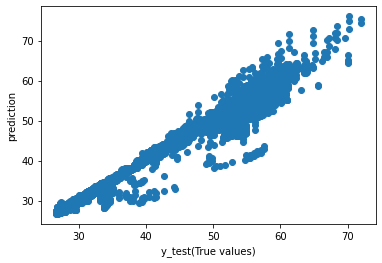

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lm = LinearRegression()
lm.fit(X_train,y_train)

prediction = lm.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('y_test(True values)')
plt.ylabel('prediction')



In [37]:
print(y_test)

      Y(t+1)  Y(t+2)  Y(t+3)  Y(t+4)  Y(t+5)  Y(t+6)  Y(t+7)  Y(t+8)  Y(t+9)  \
5456   53.94   53.87   53.51   53.11   53.13   53.02   53.04   52.71   52.57   
4142   66.19   60.42   58.46   56.53   55.69   54.97   54.59   54.33   53.84   
401    33.40   33.46   33.25   33.16   32.83   32.74   32.69   32.61   32.58   
3505   29.02   28.87   28.98   28.85   28.85   28.95   27.43   27.19   27.18   
5447   54.51   54.54   54.48   54.29   54.16   54.19   54.08   54.10   54.07   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1403   31.10   31.22   31.26   31.15   31.37   31.31   31.38   31.32   31.38   
551    33.78   33.66   33.53   33.57   33.56   33.47   33.39   33.40   33.43   
726    32.33   32.58   32.58   32.63   32.59   32.55   32.96   32.84   33.08   
3555   28.99   28.76   28.86   28.93   28.89   28.56   28.45   28.69   28.72   
1998   36.22   36.18   36.07   36.02   35.84   35.78   35.73   35.73   35.74   

      Y(t+10)  Y(t+11)  Y(t+12)  
5456 

In [38]:
from sklearn import metrics
import math
r_squared = lm.score(X, y)
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',math.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('r_squared',r_squared)


MSE 1.8883422920988748
RMSE 1.3741696736934907
r_squared 0.9802196870014915


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

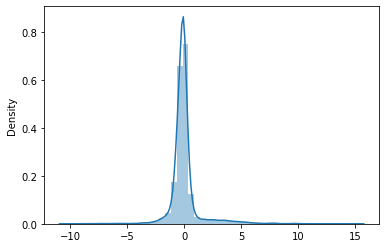

In [39]:
sns.distplot((y_test-prediction),bins=50)